# Building a churn model

### Loading common libraries

In [1]:
# Data handling and visualising
import pandas as pd
import numpy as np
from pathlib import Path
import datetime
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Machine Learning and models evaluation libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

### Connecting with the data folders

In [2]:
path = Path.cwd()
data_path = path / 'Data'

## 1. Loading and exploring the dataset

In [3]:
df_raw = pd.read_excel(data_path / 'Customer Churn.xlsx')
df_raw

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,NaN


In [4]:
# Function to normalize each name attribute (lower case and underscores instead of spaces)
def tidy(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    return df
tidy(df_raw)

,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,NaN


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         7043 non-null   object 
 1   count              7043 non-null   int64  
 2   country            7043 non-null   object 
 3   state              7043 non-null   object 
 4   city               7043 non-null   object 
 5   zip_code           7043 non-null   int64  
 6   lat_long           7043 non-null   object 
 7   latitude           7043 non-null   float64
 8   longitude          7043 non-null   float64
 9   gender             7043 non-null   object 
 10  senior_citizen     7043 non-null   object 
 11  partner            7043 non-null   object 
 12  dependents         7043 non-null   object 
 13  tenure_months      7043 non-null   int64  
 14  phone_service      7043 non-null   object 
 15  multiple_lines     7043 non-null   object 
 16  internet_service   7043 

In [6]:
#turn total_charges is an object because it has white spaces, let's replace it with NaN
df_raw = df_raw.replace(r'^\s*$', np.nan, regex=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         7043 non-null   object 
 1   count              7043 non-null   int64  
 2   country            7043 non-null   object 
 3   state              7043 non-null   object 
 4   city               7043 non-null   object 
 5   zip_code           7043 non-null   int64  
 6   lat_long           7043 non-null   object 
 7   latitude           7043 non-null   float64
 8   longitude          7043 non-null   float64
 9   gender             7043 non-null   object 
 10  senior_citizen     7043 non-null   object 
 11  partner            7043 non-null   object 
 12  dependents         7043 non-null   object 
 13  tenure_months      7043 non-null   int64  
 14  phone_service      7043 non-null   object 
 15  multiple_lines     7043 non-null   object 
 16  internet_service   7043 

In [7]:
#checking for missing values or zeros
df_raw.isna().sum() 

customerid              0
count                   0
country                 0
state                   0
city                    0
zip_code                0
lat_long                0
latitude                0
longitude               0
gender                  0
senior_citizen          0
partner                 0
dependents              0
tenure_months           0
phone_service           0
multiple_lines          0
internet_service        0
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
contract                0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges          11
churn_label             0
churn_reason         5174
dtype: int64

In [8]:
# looking at NaN values at total_charges
df_raw.loc[df_raw['total_charges'].isnull()]

,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,NaN


### missing values: 
- the attribute churn_reason presents 5174 missing values. Values are present only for thoese fields labeled as churn and therefore we can leave it as it is;
- total_charges are NaN in correspondance to those fields where tenure is zero, meaning that those customers just joined.

To facilitate the next operations, especially for the model building and evaluations it is important to turn those NaN in total_charges into zeros.

In [9]:
df_raw['tenure_months'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure_months, Length: 73, dtype: int64

In [10]:
df_raw['total_charges'] = df_raw['total_charges'].fillna(0)
df_raw.loc[df_raw['total_charges'].isnull()]

,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_reason


## 2. Data Exploration (EDA)

### Exploring numerical and categorical features

### Numerical features

In [11]:
numerical_feat = df_raw.select_dtypes(exclude=['object', 'datetime64'])  
numerical_feat

,count,zip_code,latitude,longitude,tenure_months,monthly_charges,total_charges
0,1,90003,33.964131,-118.272783,2,53.85,108.15
1,1,90005,34.059281,-118.307420,2,70.70,151.65
2,1,90006,34.048013,-118.293953,8,99.65,820.50
3,1,90010,34.062125,-118.315709,28,104.80,3046.05
4,1,90015,34.039224,-118.266293,49,103.70,5036.30
...,...,...,...,...,...,...,...
7038,1,92285,34.341737,-116.539416,72,21.15,1419.40
7039,1,92301,34.667815,-117.536183,24,84.80,1990.50
7040,1,92304,34.559882,-115.637164,72,103.20,7362.90
7041,1,92305,34.167800,-116.864330,11,29.60,346.45


In [12]:
# looking at cardinality, to divide numerical features into discrete and continuos 
numerical_feat.nunique()

count                 1
zip_code           1652
latitude           1652
longitude          1651
tenure_months        73
monthly_charges    1585
total_charges      6531
dtype: int64

In [13]:
discrete_feat = [i for i in numerical_feat if (len(numerical_feat[i].unique()) < (numerical_feat.shape[0] * 0.01))]
discrete_feat

['count']

In [14]:
continuous_feat = list(numerical_feat.drop(columns = ['count', 'zip_code', 'latitude', 'longitude']).columns)
continuous_feat
df_continuous_feat = df_raw[continuous_feat]
df_continuous_feat

,tenure_months,monthly_charges,total_charges
0,2,53.85,108.15
1,2,70.70,151.65
2,8,99.65,820.50
3,28,104.80,3046.05
4,49,103.70,5036.30
...,...,...,...
7038,72,21.15,1419.40
7039,24,84.80,1990.50
7040,72,103.20,7362.90
7041,11,29.60,346.45


In [15]:
# looking at the distribution of the continuos attributes
df_continuous_feat.describe()

,tenure_months,monthly_charges,total_charges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [16]:
# function to visualise the distribution
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

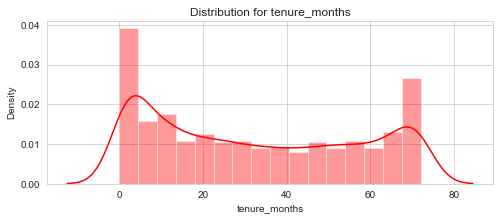

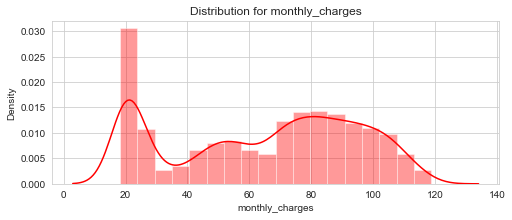

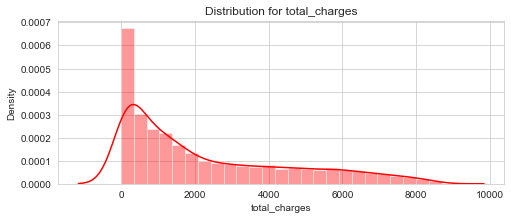

In [17]:
num_cols = df_continuous_feat.columns
for feat in num_cols: distplot(feat, df_continuous_feat)

The numerical continuos features have different distributions and are distributed over different value ranges. It will be important to normalize those ranges before applying any model. 
- Monthly charges has almost a three-modal distribution,
- Tenure months is bimodal
- Total_charges is strongly skewed

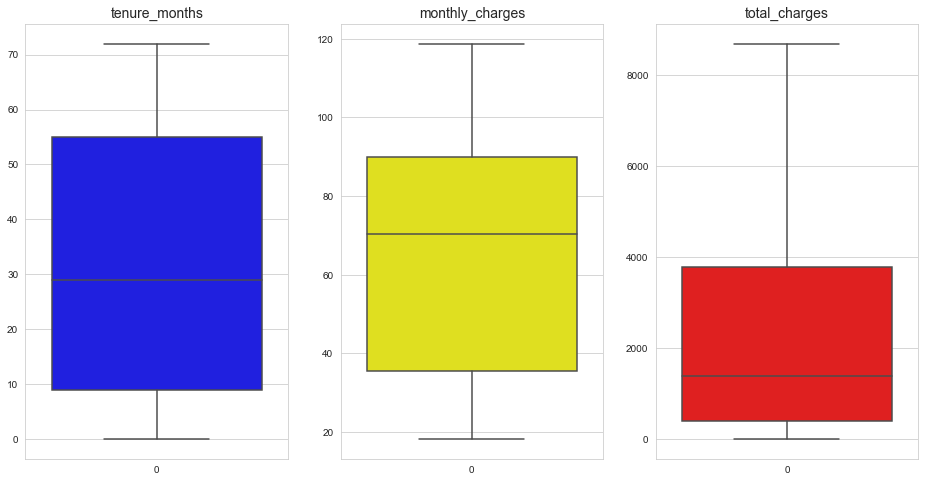

In [18]:
# Looking for outliers
box_colors = ["blue", "yellow", "red"]
continuous = df_continuous_feat.columns

f, ax = plt.subplots(1, 3, figsize=(16,8))


for i, col in enumerate(continuous[:3]):
    sns.boxplot(data = df_continuous_feat[col], ax = ax[i], color = box_colors[i])
    ax[i].set_title(col, fontsize = 14)
plt.show();

We don't have outliers.

In [19]:
# Looking at correlations within the numerical features with a correletion matrix
corr_matrix=df_continuous_feat.corr()
corr_matrix

,tenure_months,monthly_charges,total_charges
tenure_months,1.000000,0.247900,0.826178
monthly_charges,0.247900,1.000000,0.651174
total_charges,0.826178,0.651174,1.000000


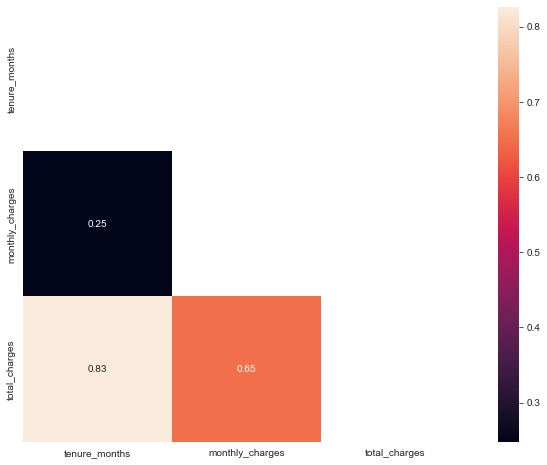

In [20]:
# visualising the matrix
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()

Total_charges correlates with tenure_months and monthly charges, We can already say that it is redondant. 

### Categorical Features

In [21]:
# Selecting only the attributes that are object
df_categorical = df_raw.select_dtypes(exclude=['int64', 'float64'])
df_categorical.nunique()

customerid           7043
country                 1
state                   1
city                 1129
lat_long             1652
gender                  2
senior_citizen          2
partner                 2
dependents              2
phone_service           2
multiple_lines          3
internet_service        3
online_security         3
online_backup           3
device_protection       3
tech_support            3
streaming_tv            3
streaming_movies        3
contract                3
paperless_billing       2
payment_method          4
churn_label             2
churn_reason           20
dtype: int64

In [22]:
# We want to exclude also those features that have cardinality 1 (e.g. country)
# the IDs and the geographical features that are objects, but actually are should be float.
# Moreover for the upcoming visualisations we are temporarly not taking into accounts churn_reason because has a cardinality of 20.

cat = (
    pd.DataFrame(df_categorical.nunique(), columns=['nunique'])
    .reset_index().rename(columns={'index':'column_name'})
)

list_cat = []
for index, row in cat.iterrows():
    if row['nunique'] > 1 and row['nunique'] <= 4:
        print(row['column_name'])
        list_cat.append(row['column_name'])

df_categorical = df_categorical[df_categorical.columns.intersection(list_cat)]

gender
senior_citizen
partner
dependents
phone_service
multiple_lines
internet_service
online_security
online_backup
device_protection
tech_support
streaming_tv
streaming_movies
contract
paperless_billing
payment_method
churn_label


IndexError: index 8 is out of bounds for axis 0 with size 8

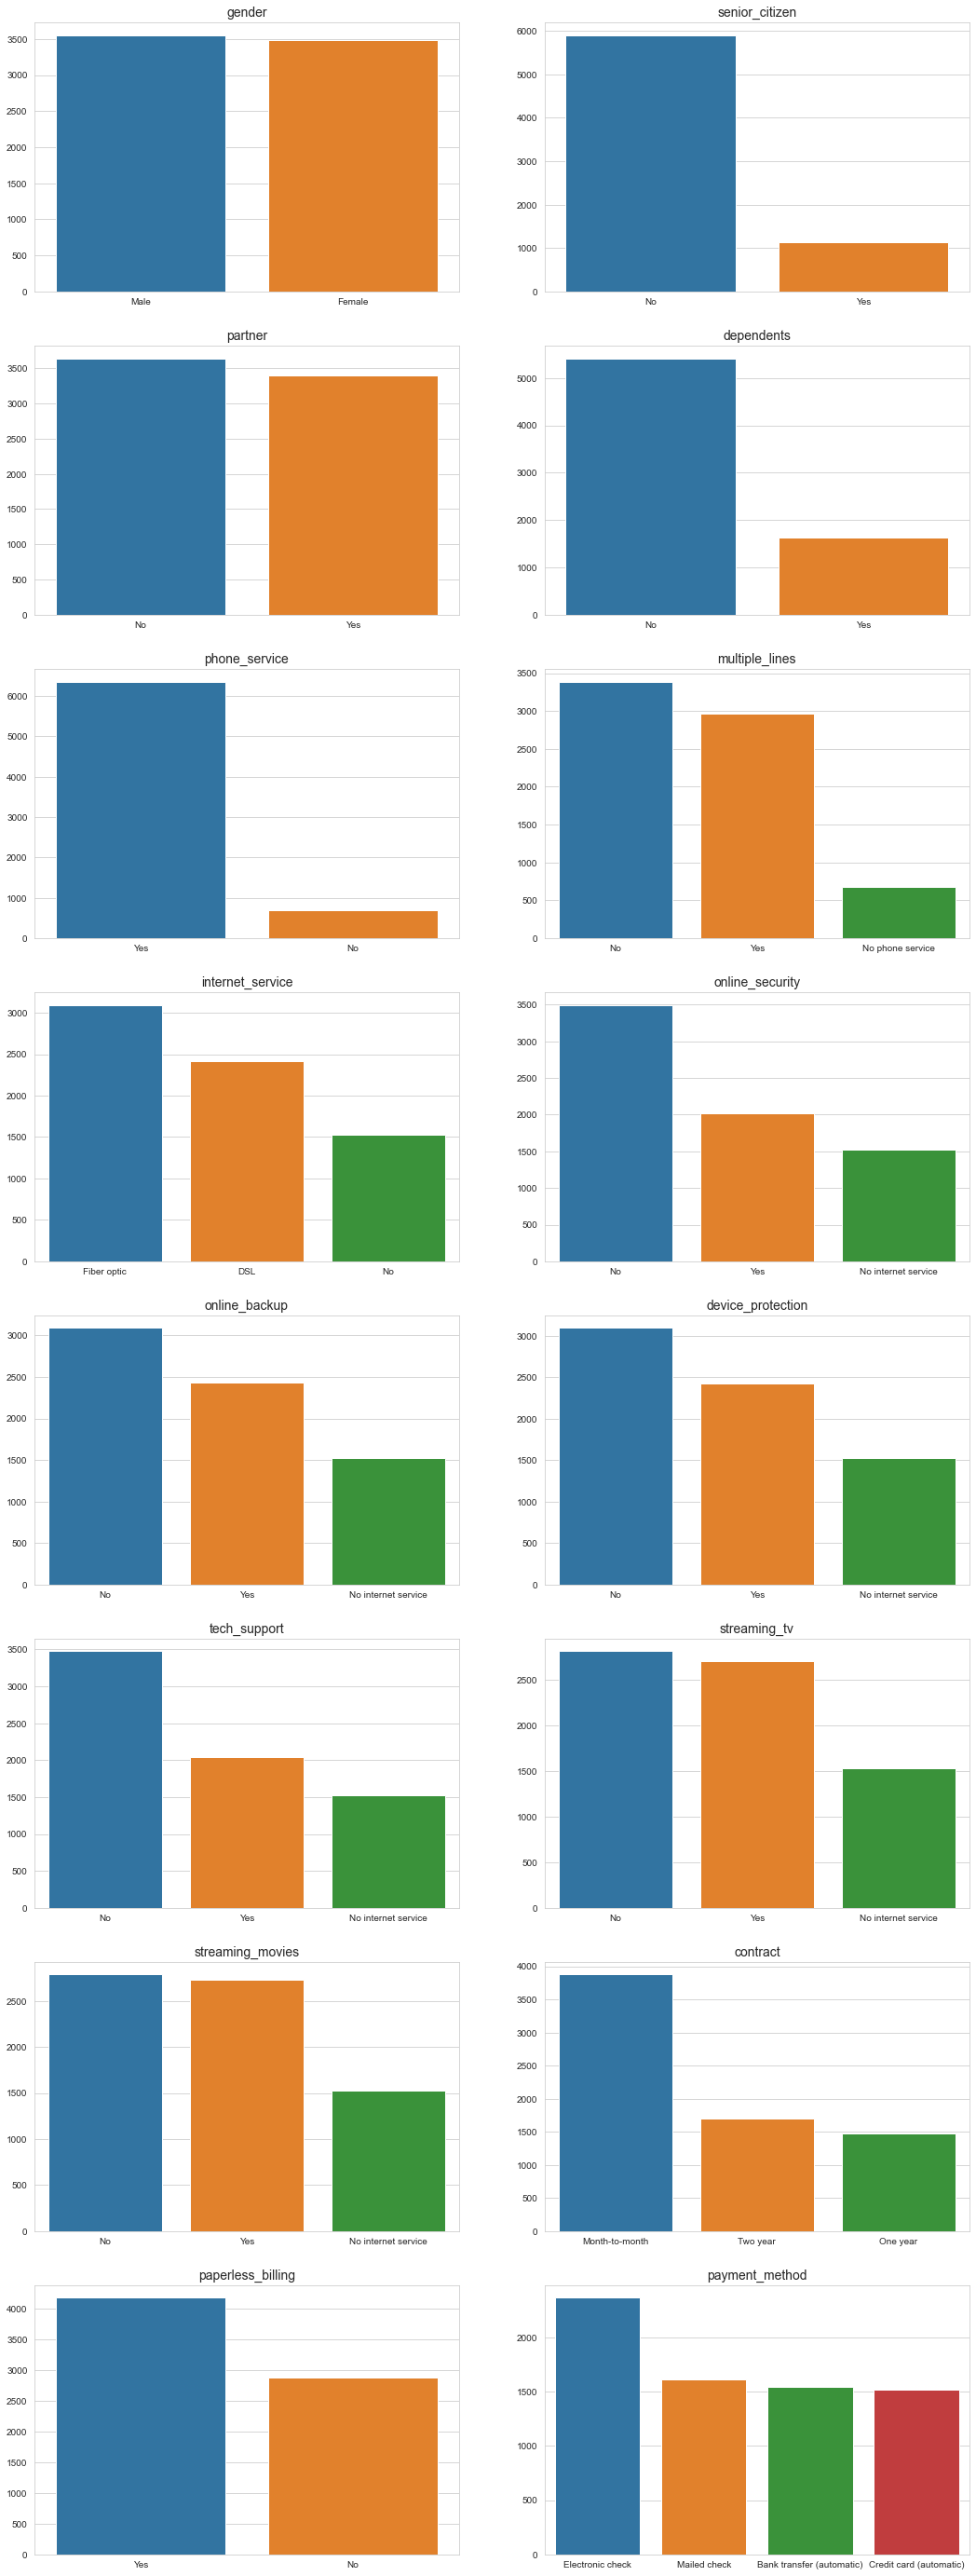

In [23]:
f, axes = plt.subplots(int(len(list_cat)/2), 2, figsize=(18, 50))
categorical = list_cat
for i, col in enumerate(categorical):

    sns.barplot(x = df_categorical[col].value_counts().index,
                y = df_categorical[col].value_counts(),
                ax=axes[int(i / 2)][int(i) % 2])  
    axes[int(i / 2)][int(i) % 2].set_title(col, fontsize = 14)
    axes[int(i / 2)][int(i) % 2].set_ylabel("")

plt.show()

plt.savefig('categorical.png')

plots of all the categorical features, excluding churn_label and churn_reason because they need a different kind of plots

In [24]:
df_nointernet = df_raw.loc[df_raw['internet_service']=='No']

## 3. Data Visualisation with some insights

### Churn rate

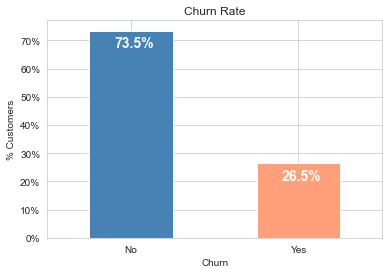

In [25]:
colors = ['#4682B4','#FFA07A']
ax = (df_raw['churn_label'].value_counts()*100.0 /len(df_raw)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn Rate')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+0.15, i.get_height()-6, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=14,
            color='white',
           weight = 'bold')

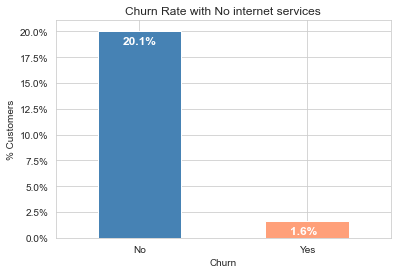

In [26]:
colors = ['#4682B4','#FFA07A']
ax = (df_nointernet['churn_label'].value_counts()*100.0 /len(df_raw)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn Rate with No internet services')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-1.3, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

- It looks like that almost 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives.
- Interesting to notice that if the customers have a plan that does not involve internet services, the likely to churn is almost 5 times smaller.

### Churn reasons by demographics

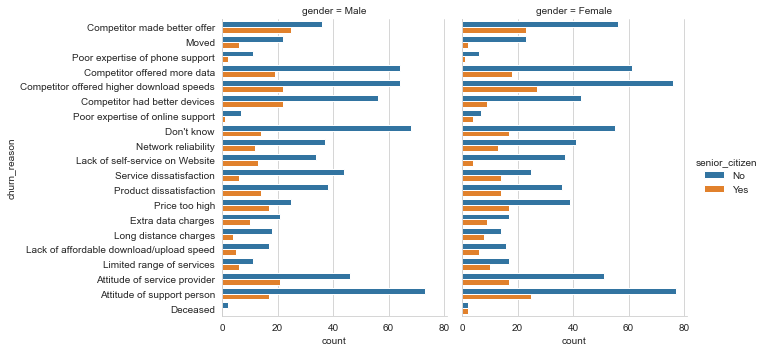

In [27]:
g = sns.catplot(y="churn_reason", hue='senior_citizen', col='gender',

                data=df_raw.sort_values(by='count', ascending=False), kind="count", orient='v');

In [28]:
# Top 10 reasons to churn
df_raw['churn_reason'].value_counts()[:10]

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Name: churn_reason, dtype: int64

### Churn by contract type

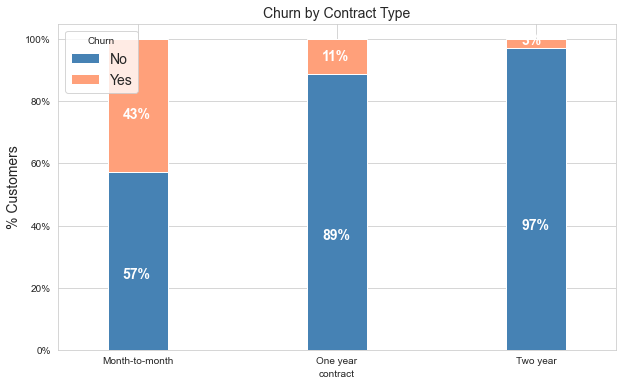

In [29]:
colors = ['#4682B4','#FFA07A']
contract_churn = df_raw.groupby(['contract','churn_label']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

- It looks like the customers who have a month to month contract have a very high churn rate compared to those who have longer contracts

### Churn Rate by Tenure months

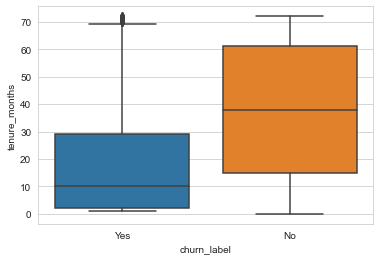

In [30]:
sns.boxplot(x = df_raw.churn_label, y = df_raw.tenure_months);

- Consequently, the customers who do not churn tend to stay for a longer tenure with the company.
- The distribution of the customers who churn when we lool at the tenure months is quite skewed and it looks like we have some outliers for those customers who staied for a long time. Could be interesting to look better at the reasons why those customers churned.

### Churn by Monthly Charges

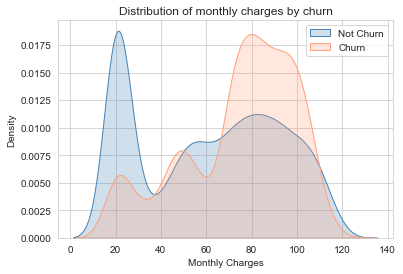

In [31]:
ax = sns.kdeplot(df_raw.monthly_charges[(df_raw["churn_label"] == 'No') ],
                color="#4682B4", shade = True)
ax = sns.kdeplot(df_raw.monthly_charges[(df_raw["churn_label"] == 'Yes') ],
                ax =ax, color="#FFA07A", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn');


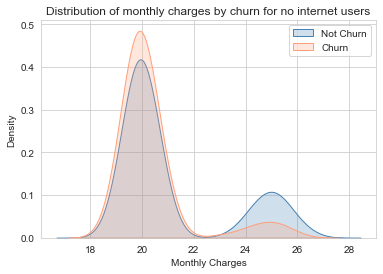

In [32]:
ax = sns.kdeplot(df_nointernet.monthly_charges[(df_raw["churn_label"] == 'No') ],
                color="#4682B4", shade = True)
ax = sns.kdeplot(df_nointernet.monthly_charges[(df_raw["churn_label"] == 'Yes') ],
                ax =ax, color="#FFA07A", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn for no internet users');


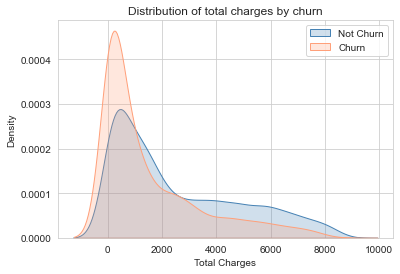

In [33]:
ax = sns.kdeplot(df_raw.total_charges[(df_raw["churn_label"] == 'No') ],
                color="#4682B4", shade = True)
ax = sns.kdeplot(df_raw.total_charges[(df_raw["churn_label"] == 'Yes') ],
                ax =ax, color="#FFA07A", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn');


Looking at the distribution of the numerical features and churn, we can see that customers with high monthly charges will leave .From the the distribution we can see that the higher the fee the bigger the chance to leave, comapered with those with lower fees (and services). Customers without internert services have lower fees and have the same distribution of those who will stay. Finally the total charges: as we saw from the tenure vs churn box plot, who decides to leave, will do it at early stages, so the distribution of churn for the total charges is skewed on the left, underlining that. However the distribution of total charges is the same regardless if they leave or not.

### Churn by internet service

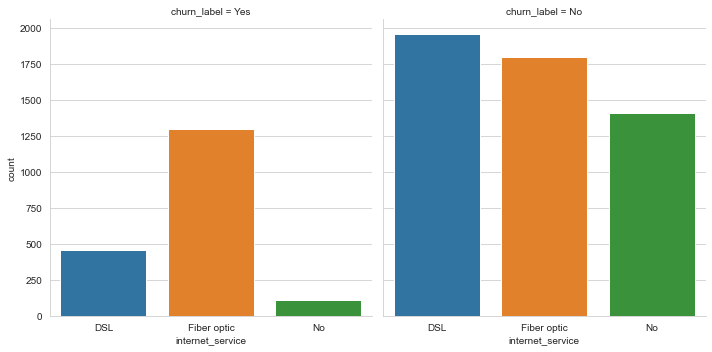

In [34]:
g = sns.catplot(x="internet_service",  col='churn_label',

                data=df_raw, kind="count", orient='v');

Customers with internet service with optical fiber are more likely to churn

### Churn by Payment Methods

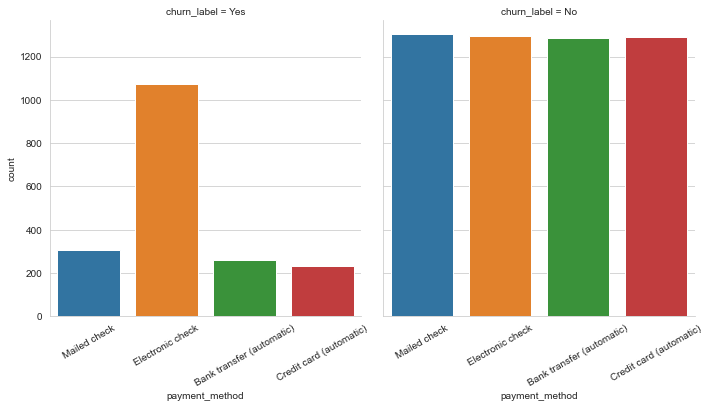

In [35]:
g = sns.catplot(x="payment_method",  col='churn_label',

                data=df_raw, kind="count")
g.set_xticklabels(rotation=30);

Customers that use electronic checks to pay their bills are more likely to churn.

## Checking correlations among variables to avoid multicollinearity

In [36]:
#Remove customer IDs and geographical data (besides zipcode) from the data set

df_2 = df_raw[['gender', 'senior_citizen', 'partner', 'dependents',
       'tenure_months', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn_label']]
#Convertin the predictor variable in a binary numeric variable
df_2['churn_label'].replace(to_replace='Yes', value=1, inplace=True)
df_2['churn_label'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df_2)
df_dummies.head()


,tenure_months,monthly_charges,total_charges,churn_label,gender_Female,gender_Male,senior_citizen_No,senior_citizen_Yes,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,internet_service_DSL,internet_service_Fiber optic,internet_service_No,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,2,70.70,151.65,1,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,8,99.65,820.50,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
3,28,104.80,3046.05,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4,49,103.70,5036.30,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0


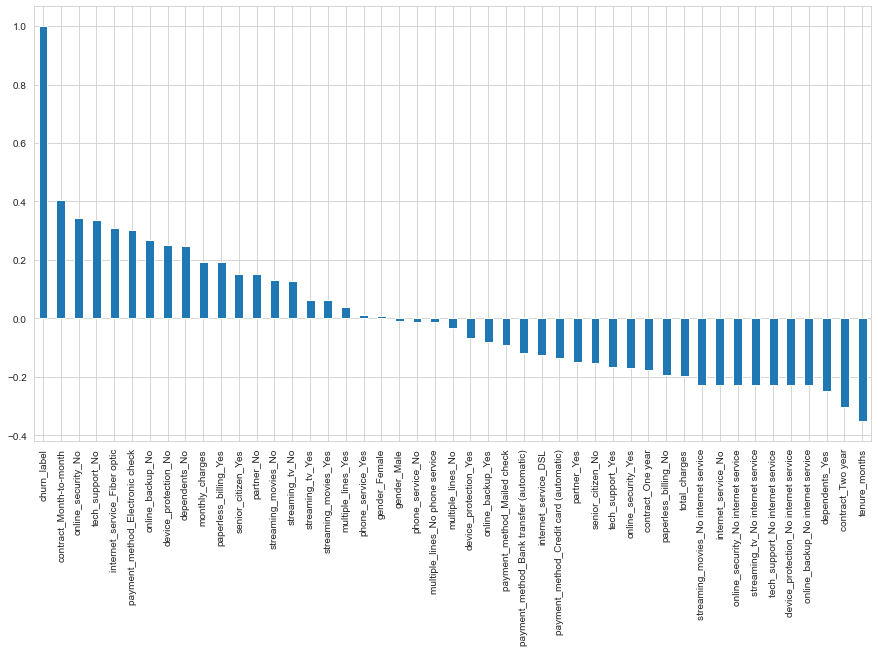

In [37]:
#Get Correlation of "churn_label" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['churn_label'].sort_values(ascending = False).plot(kind='bar');

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

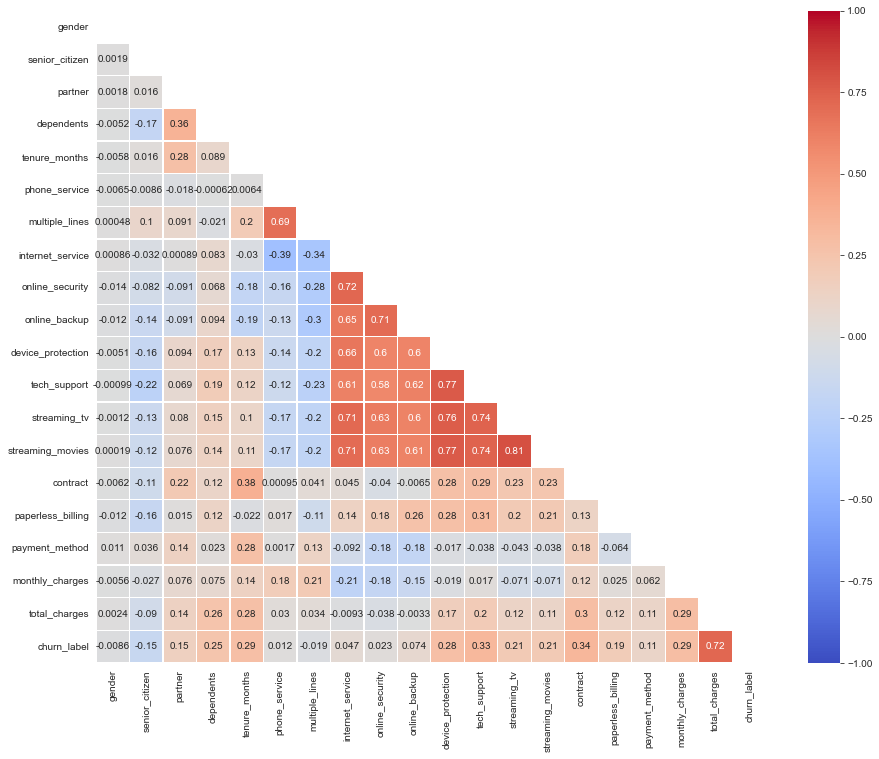

In [38]:
plt.figure(figsize=(15, 12))

corr = df_raw[['gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label']].apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)


All the internet related services seem to correlate with each others. Same goes for phone services and multiple lines. And as we saw the higher the total charges, the higher the churn. 
These attributes are redondant, we need to eliminate this effect before we feed the data to the model in order to not cause overestimations.

## 4. Feature Engineering

- We can see that "No internet service" is repeating several times across the dataset and it is equivalent to the value "No" of the same attribute.
- So we bin "No internet service" with "No" in order to have two unique values.
- Same goes for the attribute "multiple_lines" which has a "No phone service" option, which has the same meaning as "No" so we can bin it also here.

In [39]:
df_cust = df_raw.copy()

df_cust[['online_security','online_backup','device_protection',
        'tech_support','streaming_tv','streaming_movies']] = (
    df_cust[['online_security','online_backup','device_protection',
            'tech_support','streaming_tv','streaming_movies']].replace('No internet service','No')
)

df_cust[['multiple_lines']] = df_cust[['multiple_lines']].replace('No phone service', 'No')

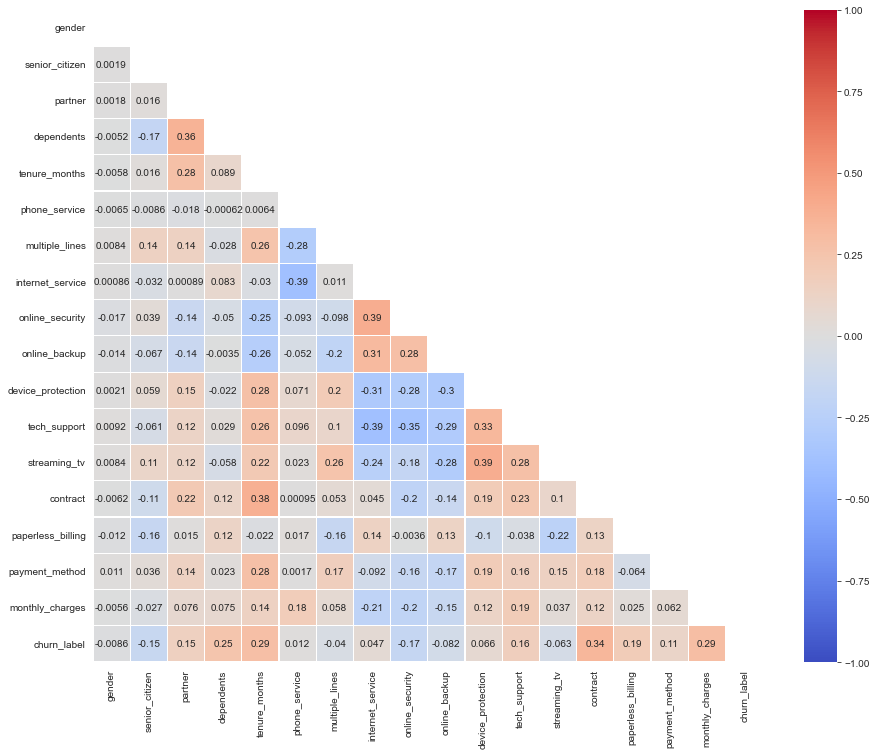

In [41]:
plt.figure(figsize=(15, 12))

corr = df_cust[['gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'churn_label']].apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)


Eliminating total charges streming movies we reduced highly the correlations.

## 5. Data Preprocessing

In [43]:
# Turning each categorical attribute into a number
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [44]:
# selecting only the attributes that make sense to feed the model 
#(thus excluding the IDs, the geographical data and those attributes with NaN and those that were correlating)
df = df_cust[['gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
        'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label']].apply(lambda x: object_to_int(x))
df.head()

,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label
0,1,0,0,0,2,1,0,0,1,1,0,0,0,0,1,3,53.85,108.15,1
1,0,0,0,1,2,1,0,1,0,0,0,0,0,0,1,2,70.70,151.65,1
2,0,0,0,1,8,1,1,1,0,0,1,0,1,0,1,2,99.65,820.50,1
3,0,0,1,1,28,1,1,1,0,0,1,1,1,0,1,2,104.80,3046.05,1
4,1,0,0,1,49,1,1,1,0,1,1,0,1,0,1,0,103.70,5036.30,1


#### Splitting data into train and test sets

In [45]:
# Splitting into train and test
X = df.drop(columns = ['churn_label'])
y = df['churn_label'].values

X_train, X_test, y_train, y_test = (
    train_test_split(X,y,test_size = 0.30, random_state=101)
)


The dataset requires further encoding: Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding


#### Standardazing numeric attributes

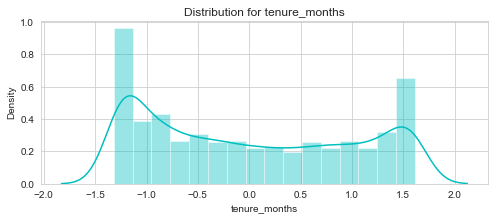

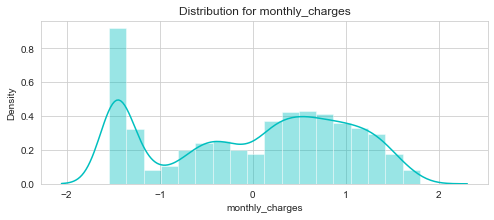

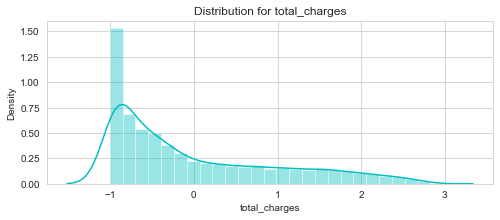

In [46]:

df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in num_cols: distplot(feat, df_std, color='c')

#### Encoding

In [47]:
# those that need one-hot encoding
cat_cols_ohe =['payment_method', 'contract', 'internet_service']
 #those that need label encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe))

In [48]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## 6. Choosing and evaluating the best ML model

### a. KNN

In [49]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)

accuracy= []
recall =[]
precision = []
model_names =[]

accuracy.append(round(accuracy_score(y_test, predicted_y),4))
recall.append(round(recall_score(y_test, predicted_y),4))
precision.append(round(precision_score(y_test, predicted_y),4))

model_names = ['KNN']
result_df1 = pd.DataFrame({'Accuracy':accuracy_knn,'Recall':recall, 'Precision':precision}, index=model_names)
result_df1

,Accuracy,Recall,Precision
KNN,0.784193,0.5806,0.6207


### b. Logistic Regression

In [50]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)

accuracy= []
recall =[]
precision = []
model_names =[]

accuracy.append(round(accuracy_score(y_test, lr_pred),4))
recall.append(round(recall_score(y_test, lr_pred),4))
precision.append(round(precision_score(y_test, lr_pred),4))

model_names = ['Logistic Regression']
result_df2 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Precision':precision}, index=model_names)
result_df2

Logistic Regression accuracy is : 0.8021769995267393


,Accuracy,Recall,Precision
Logistic Regression,0.8022,0.5993,0.6598


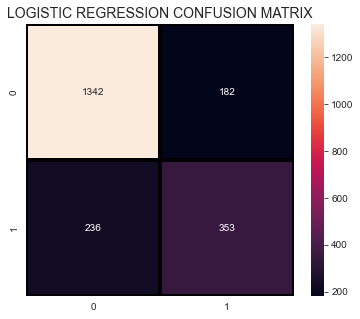

In [51]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

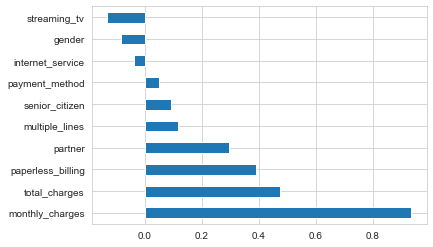

In [52]:
weights_lr = pd.Series(lr_model.coef_[0],
                 index=X.columns.values)
weights_lr.sort_values(ascending = False)[:10].plot(kind='barh');


### c. Random Forest

In [53]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

accuracy= []
recall =[]
precision = []
model_names =[]

accuracy.append(round(accuracy_score(y_test, prediction_test),4))
recall.append(round(recall_score(y_test, prediction_test),4))
precision.append(round(precision_score(y_test, prediction_test),4))

model_names = ['Random Forest']
result_df3 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Precision':precision}, index=model_names)
result_df3

,Accuracy,Recall,Precision
Random Forest,0.8036,0.5195,0.6986


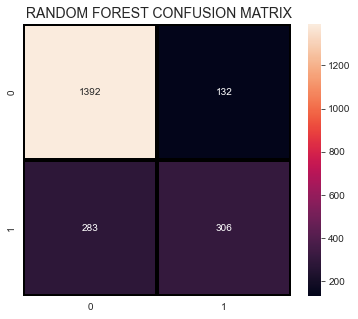

In [54]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

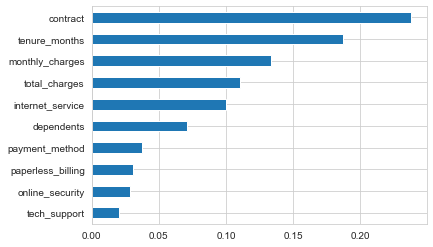

In [55]:
importances = model_rf.feature_importances_
weights_rf = pd.Series(importances,
                 index=X.columns.values)
weights_rf.sort_values()[-10:].plot(kind = 'barh');


### d. Decision Tree

In [56]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)

accuracy= []
recall =[]
precision = []
model_names =[]

accuracy.append(round(accuracy_score(y_test, predictdt_y),4))
recall.append(round(recall_score(y_test, predictdt_y),4))
precision.append(round(precision_score(y_test, predictdt_y),4))

model_names = ['Decision Tree']
result_df4 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Precision':precision}, index=model_names)
result_df4

,Accuracy,Recall,Precision
Decision Tree,0.726,0.511,0.5084


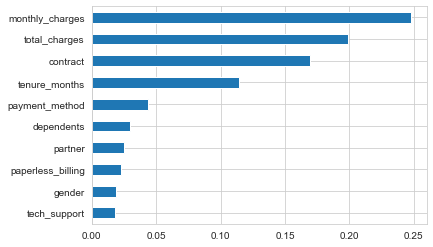

In [57]:
importances = dt_model.feature_importances_
weights_dt = pd.Series(importances,
                 index=X.columns.values)
weights_dt.sort_values()[-10:].plot(kind = 'barh');


### e. Ada Boost

In [58]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
accuracy_ad = metrics.accuracy_score(y_test, a_preds)

accuracy= []
recall =[]
precision = []
model_names =[]

accuracy.append(round(accuracy_score(y_test, a_preds),4))
recall.append(round(recall_score(y_test, a_preds),4))
precision.append(round(precision_score(y_test, a_preds),4))

model_names = ['Ada Boost']
result_df5 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Precision':precision}, index=model_names)
result_df5

,Accuracy,Recall,Precision
Ada Boost,0.8041,0.5891,0.6686


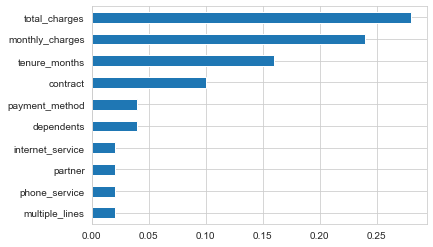

In [59]:
importances = a_model.feature_importances_
weights_ab = pd.Series(importances,
                 index=X.columns.values)
weights_ab.sort_values()[-10:].plot(kind = 'barh');


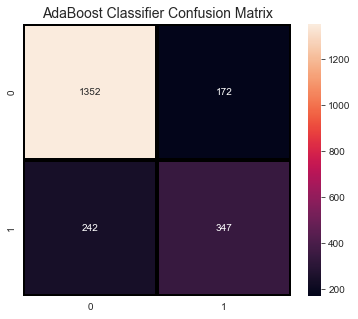

In [60]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

### f. Gradient Boosting Classifier

In [61]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

accuracy= []
recall =[]
precision = []
model_names =[]

accuracy.append(round(accuracy_score(y_test, gb_pred),4))
recall.append(round(recall_score(y_test, gb_pred),4))
precision.append(round(precision_score(y_test, gb_pred),4))

model_names = ['Gradient Boosting Classifier']
result_df6 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Precision':precision}, index=model_names)
result_df6

,Accuracy,Recall,Precision
Gradient Boosting Classifier,0.8045,0.5603,0.6818


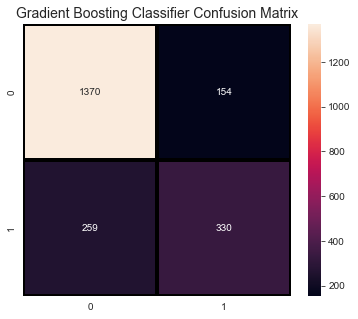

In [62]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

### g. XGBoost Classifier

In [63]:
xgbc_base = XGBClassifier(random_state=0, scale_pos_weight=3)

xgbc_base.fit(X_train, y_train)
xgbc_pred = xgbc_base.predict(X_test)

accuracy= []
recall =[]
precision = []
model_names =[]

accuracy.append(round(accuracy_score(y_test, xgbc_pred),4))
recall.append(round(recall_score(y_test, xgbc_pred),4))
precision.append(round(precision_score(y_test, xgbc_pred),4))

model_names = ['XGBClassifier']
result_df7 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Precision':precision}, index=model_names)
result_df7


,Accuracy,Recall,Precision
XGBClassifier,0.7601,0.6859,0.5565


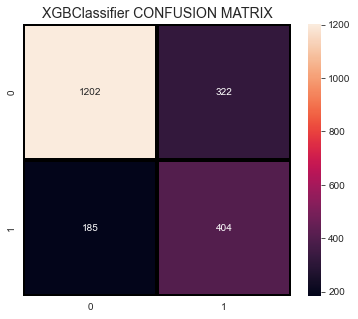

In [64]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, xgbc_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XGBClassifier CONFUSION MATRIX",fontsize=14)
plt.show()


### h. Catboost Classifier

In [65]:
catboost_base = CatBoostClassifier(verbose=False,random_state=0, scale_pos_weight=5)

catboost_base.fit(X_train, y_train)
catb_pred = catboost_base.predict(X_test)

accuracy= []
recall =[]
precision = []
model_names =[]

accuracy.append(round(accuracy_score(y_test, catb_pred),4))
recall.append(round(recall_score(y_test, catb_pred),4))
precision.append(round(precision_score(y_test, catb_pred),4))

model_names = ['Catboost Classifier']
result_df8 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Precision':precision}, index=model_names)
result_df8


,Accuracy,Recall,Precision
Catboost Classifier,0.7411,0.8353,0.5223


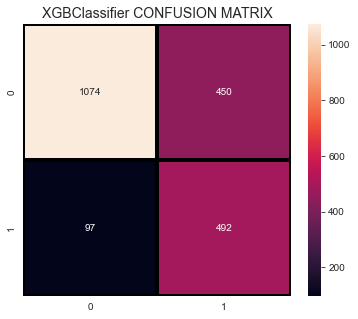

In [66]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, catb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XGBClassifier CONFUSION MATRIX",fontsize=14)
plt.show()


In [67]:
result_final= pd.concat([result_df1,result_df2,result_df3,result_df4,result_df5,result_df6, result_df7,result_df8],axis=0)
result_final

,Accuracy,Recall,Precision
KNN,0.784193,0.5806,0.6207
Logistic Regression,0.802200,0.5993,0.6598
Random Forest,0.803600,0.5195,0.6986
Decision Tree,0.726000,0.5110,0.5084
Ada Boost,0.804100,0.5891,0.6686
Gradient Boosting Classifier,0.804500,0.5603,0.6818
XGBClassifier,0.760100,0.6859,0.5565
Catboost Classifier,0.741100,0.8353,0.5223


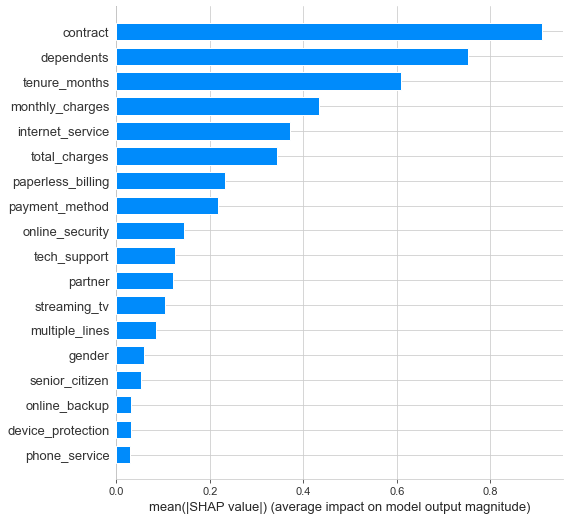

In [70]:
# Looking at the weight that attributes have on the 
# best performing classifier (Catboost)

import shap
explainercatb = shap.TreeExplainer(catboost_base)
shap_values_catb_test = explainercatb.shap_values(X_test)
shap_values_catb_train = explainercatb.shap_values(X_train)

shap.summary_plot(shap_values_catb_train, X_train, plot_type="bar")

## 7. Concluding Remarks

In the last section I applied different ML models that are commonly used in binary classification problems. In this specific case, since we want to have a model that predicts the number of customers who will churn, we can look at the recall metric, which gives us the score of the number of correct positive predictions made out of all correct positive predictions.

The comparisons among the models used underline that using boost classifiers algorithms helps in situations of unbalanced data, as in this specific case. In terms of recall, the best model is Catboost classifier. 

Moreover, in both XGBoost and CatBoost classifiers using the parameter scale_pos_weight allows to get the number of total number of examples in the majority class divided by the total number of examples in the minority class, yielding better performances.

By using recommended formula for scale_pos_weight=5, CatBoost correctly predicted 84% of the churned customers.

Looking at the weight that each feature in the dataset had on the best performing model, we can infer that the top 3 reasons of churn are:
- type of contract, 
- having dependents 
- Tenure 

These results confirm what outlined in the exploratory analysis of the dataset and from the reasons of churn when present in the dataset.
